## <center>Khalifa University</center>
## <center>Computer Science Department
### <center>ENGR 202: Data Science and Artificial Intelligence- Spring 2024
# <center>Lab6: Supervised Machine Learning - MNIST Classification (Part 2)
### Aim: 
    
This lab aims to test your knowledge gained about the MNIST Classification problem, machine learning model training and evaluation, and fine-tuning hyperparameters in a machine learning model. You will practice these concepts in this lab with a Random Forest Classifier (RFC) instead of a Decision Tree Classifier (DTC). 

### Objectives:		
    
* Solidate concepts of fine-tuning, training, and evaluation for machine learning models

* Understand the concept of Random Forest Classifier (RFC).
    
* Evaluate and compare the performance of RFC and DTC
  
    

#### Risk Assessment: Low


# Introduction:

You will use the MNIST dataset, similar to the last lab, and replace the decision tree classifier model with a random forest classifier.

# Part (1): MNIST Data Preparation: Student Excersie

In this part, you will complete code below to read MNIST data and split it into training, testing, and validation sets. You may refer to the previous lab to complete this task.


**Q1.Use `fetch_openml()`  from sklearn dataset to fetch MNIST dataset.**

In [3]:
# Import fetch_openml to fetch MNIST data
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
dataset = fetch_openml('mnist_784', as_frame=False)


As you learned in the previous lab, MNIST images are stored in the dictionary under key named "**data**" while contained numbers in the images are stored as text in a key named "**target**". 

**Q2**: Define a variable called **X** to stored all images and another variable called **y** to store the corresponding contained number

In [5]:
X = dataset.data
y = dataset.target

**Q3**: As you did in the last lab, split both `X` and `y` to 70% for training, 20% for validation, and 10% for testing. 

In [6]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

# Split the training and test into 70% training and 30% test
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)

# Split the test into 1/3 for test and 2/3 for validation.
X_val, X_test   = train_test_split(X_test, test_size=0.33, random_state=42)
y_val, y_test   = train_test_split(y_test, test_size=0.33, random_state=42)

# Part (2): Random Forest Classifier

In this section, you will train and evaluate Random Forest Classifier model on MNIST dataset. Next, you will compare the performance with the performance you obtained last lab, after finetuning the number of leafs in the tree. 

## Model Initialization
**Q4** Define `RandomForestClassifier` classifier from `sklearn.ensemble`. Make sure that the initialized model has the following parameters `random_state=0` and `n_estimators=50`.

In [7]:
# Import RandomForestClassifier class.
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model with random_state=0 and n_estimators = 50.
rfc_model = RandomForestClassifier(random_state=0, n_estimators=50)

Random forest classifier is a generalization of the decision tree model that uses multiple decision trees instead of a single tree, as you did in your last lab. The number of decision trees in the random forest classifier is determined by `n_estimators` parameter. The definition you did in Q4 initializes a random forest model with 50 trees. 

As you may notice, `n_estimators` or the number of decision trees is a hyper-parameter, similar to the number of leaves in the decision tree you did last lab. Thus, you should start by fine-tuning this parameter using a similar approach you used in the last lab.

**Q5** Define a list called `n_estimators_values` with the following potential number of trees: `[5, 10, 20, 40, 60, 80, 100]`

In [8]:
n_estimators_values =[5, 10, 20, 40, 60, 80, 100]

You will follow the same steps you did in the last lab to evaluate the random forest model performance with different numbers of decision trees.

**Q7**: Complete the finetuning code.

In [9]:
# Define two empty lists to store the accuracy of the training and validation data
from sklearn.metrics import accuracy_score
train_acc_list = []
val_acc_list   = []

# (1) Iterate over all potential n_estimators
for n_estimators in n_estimators_values:
    # (2) Define a random forest model with the given `n_estimators` and `random_state=0`.
    rfc_model = RandomForestClassifier(random_state=0, n_estimators=n_estimators)

    #(3) Train the model on the training dataset.
    rfc_model.fit(X_train, y_train)

    #(4) Use the training model to predict the classification of the training data.
    predictions_train = rfc_model.predict(X_train)

    #(5) Use the training model to predict the classification of the validation data.
    predictions_val = rfc_model.predict(X_val)
        
    # (6) Use `accuracy_score` to compute the classification accuracy of the training predictions.
    acc_train = accuracy_score(y_train, predictions_train)
    
    # (7) Use `accuracy_score` to compute the classification accuracy of the validation predictions.
    acc_val = accuracy_score(y_val, predictions_val)

    
    # Add the computed train accuracy to the train_acc_list
    train_acc_list.append(acc_train)
   
    # Add the computed validation accuracy to the val_acc_list
    val_acc_list.append(acc_val)
    
    print("n_estimators: %d  \t Acc for training data:  %f  \t\t Acc for validation data:  %f" %(n_estimators, acc_train, acc_val))

n_estimators: 5  	 Acc for training data:  0.994449  		 Acc for validation data:  0.915849
n_estimators: 10  	 Acc for training data:  0.999408  		 Acc for validation data:  0.942857
n_estimators: 20  	 Acc for training data:  0.999918  		 Acc for validation data:  0.956219
n_estimators: 40  	 Acc for training data:  1.000000  		 Acc for validation data:  0.963113
n_estimators: 60  	 Acc for training data:  1.000000  		 Acc for validation data:  0.963966
n_estimators: 80  	 Acc for training data:  1.000000  		 Acc for validation data:  0.965387
n_estimators: 100  	 Acc for training data:  1.000000  		 Acc for validation data:  0.966098


Although you might have some insightes from the print above, but it still clear which option achieves the best performance. Hence, you will visualize the distribution of the training and valudation accuracy at each option to determine the best value for the leaf nodes.

**Q8: Complete the missing parts of the code below to do the visualization successfully.**

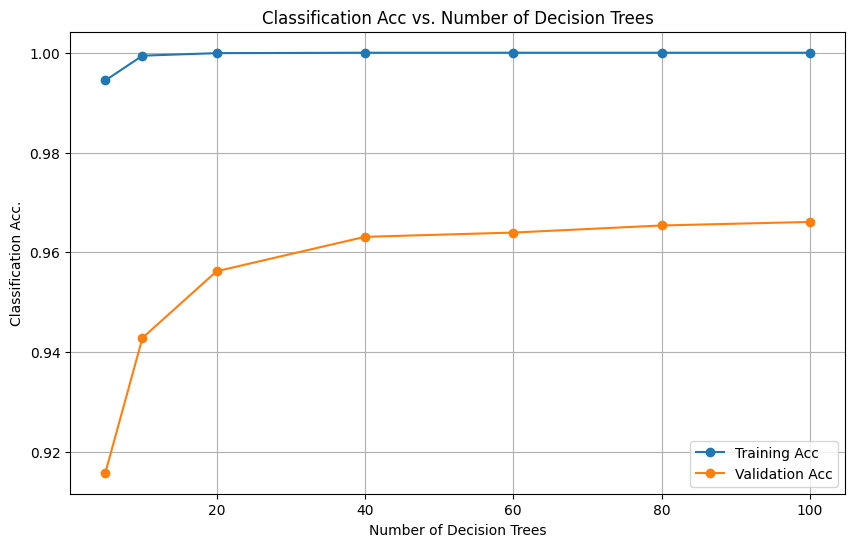

In [10]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_acc_list, label='Training Acc', marker='o')
plt.plot(n_estimators_values, val_acc_list, label='Validation Acc', marker='o')
plt.xlabel('Number of Decision Trees')
plt.ylabel('Classification Acc.')
plt.title('Classification Acc vs. Number of Decision Trees')
plt.legend()
plt.grid(True)
plt.show()

**Q9: What is the best value for the leaf node?**

We can say the n_estimators=40 can be the best valur for the leaf node. The differnce between it and the tree with n_estimators=100 is minimal. Yet it has a better training time and prediction time which can be better in a later stages of the model.

Now, do the following steps to test your selection:
1. Create a random forest model with the best number of decision trees.
2. Train it on the training dataset.
3. Use `predict` function to predict the contained digit in the **testing** dataset images.
4. Compute the accuracy between the predicted and the actual digit of the testing dataset.
5. print the accuracy

In [11]:
# init the random forest classifier with n_estimators=40 and random_state=0
rfc = RandomForestClassifier(random_state=0, n_estimators=40)
#train the model
rfc.fit(X_train, y_train)
#predict the test data
predictions = rfc.predict(X_test)
#compute the accuracy of the test data
acc = accuracy_score(y_test, predictions)
print("Accuracy for test data: ", acc)

Accuracy for test data:  0.962049062049062


**Q10: Based on the classification accuracy you obtained from the random forest classifier with the selected number of decision tress and the decision tree (with finetuned max number of leafs), which one has better performance on the test dataset?**

We can see that the test accuracy using Random Forest Classifier is much higher compared to Decision Tree Classifier from last lap and this is due to the Decision Trees have more overfitting issue compared to Random Forest Classifier.

**Q11**: Based on the results obtained from the finetuning, is there a chance for further improvement in the classification accuracy? and why?

While the accuracy of the model is high, we can obtain higher accuracy by performing image augmentaion to increase the number of instances or use Neural Netweorks as a more complex model.